### Sampling Distributions done by Chrysanthi.Mentor.DAND

In order to gain a bit more comfort with this idea of sampling distributions, let's do some practice in python.

Below is an array that represents the students we saw in the previous videos, where 1 represents the students that drink coffee, and 0 represents the students that do not drink coffee.

In [3]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt

students = np.array([1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0])

`1.` Find the proportion of students who drink coffee in the above array. Store this value in a variable **p**.

In [4]:
#I use len() to find the lenght of my array thus the number of all students present in my numpy array
print(len(students))
#I create boolean masks, coffe_drinkers and non_coffe_drinkers. Then I sum up true and false values
coffee = (students == 1).sum()
non_coffee= (students == 0).sum()
print(coffee)
print(non_coffee)
#I calculate proportion of coffee dirnkers and non coffee drinkers
coffee_prop = coffee/len(students)
non_coffee_prop = non_coffee/len(students)
print(coffee_prop)
print(non_coffee_prop)
p = coffee_prop

21
15
6
0.7142857142857143
0.2857142857142857


In [5]:
#As data analysts though we can make our lives easier as Josh is proposing
#We are lucky we have only two values in our array 0 and 1 - it would not work for more different values (es. choc drinkers)
#Since we have an array made out of 0 and 1, if we found the mean of this array the result is equal to the of coffe drinkers
students.mean()
p = students.mean() # this is the same as coffee_prop but I overwrite for the sake of semplicity
print(p)

0.7142857142857143


`2.` Use numpy's **random.choice** to simulate 5 draws from the `students` array.  What is proportion of your sample drink coffee?

In [6]:
#I use np.random.choice() to simulate a random sample of five values taken from my student array
student_sample = np.random.choice(students, 5, replace=True)
print(student_sample)

[0 1 1 1 0]


`3.` Repeat the above to obtain 10,000 additional proportions, where each sample was of size 5.  Store these in a variable called `sample_props`.

In [7]:
#I use the above lines of code to obtain not one, but 10 000 random samples of five values, 
#taken from my very same student array. I print my student array
print('My students array is: {}'.format(students))
#For my for loop, I have to initialize an empty list where I will keep my 10 000 samples
sample_props = []
#I use value instead of _ that Josh is using
#We use _ when we are not interested in the specific value in our for loop
#range(10000) is used to create an enumerator of 10000 elements
#this is a "trick" to do the same thing 10000 times
print('My enumerator container is: {}'.format(len(range(10000))))
for value in range(10000):
    sample = np.random.choice(students, 5, replace=True)
    #here we append the operation to the initially empty array sample_pros. 
    #every time we run the loop we create a five value sample taken from our student array
    #We do this for 10 000 times and i save the mean of those samples in my sample_props list
    sample_props.append(sample.mean())
    
print('My last sample simulation is: {}'.format(sample)) #this prints the last sample
print(sample_props[-5:])

My students array is: [1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0]
My enumerator container is: 10000
My last sample simulation is: [1 1 1 1 1]
[1.0, 0.8, 0.6, 0.6, 1.0]


`4.` What is the mean proportion of all 10,000 of these proportions?  This is often called **the mean of the sampling distribution**.

In [8]:
#Now we do the very same thing we have been doing with our student array before
#with the sample_props list IMPORTANT! At the moment sample_props is a python list!
#NOT a numpy array. Please recall that python can do little stuff with lists
#We use NumPy to work with lists but to do so, we have to transform this to a np array:
sample_props = np.array(sample_props) # transform sample_props from list to np array
print(sample_props[0:5]) #notice how sample_props array is different to python list - no commas -
#also recall that sample_props keeps the MEANS of each sample

[0.6 0.4 0.4 0.8 1. ]


`5.` What are the variance and standard deviation for the original 21 data values?

In [9]:
#recall that students is the initial list provided by Josh
#We have not transformed that list to a numpy array so we work with python3 - not NumPy
#lets calculate standard deviation and varance using general python3 then 
print(students.std())
print(students.var())
#lets make this a bit more goodloking ;-)
print('The standard deviation for the original data is {}'.format(students.std()))
print('The variance for the original data is {}'.format(students.var()))

0.45175395145262565
0.20408163265306126
The standard deviation for the original data is 0.45175395145262565
The variance for the original data is 0.20408163265306126


`6.` What are the variance and standard deviation for the 10,000 proportions you created?

In [10]:
#We now go back to do the same thing with our sample_props NumPy array - NOT list :-)
#recall sample_props is a list of means of the 10 000 samples generated - so 10 000 means
print(sample_props.std()) 
print(sample_props.var())
#COMPARE THE variance of the 10 000 samples in sample_props and students!!!!! 

0.2043624231604235
0.041763999999999996


`7.` Compute p(1-p), which of your answers does this most closely match?

In [11]:
# Recall when Sebastian was talking about probability. 
#Here's Josh on 1-p https://youtu.be/dsVKoXymYDU
print(p*(1-p)) 
#The result is the variance of our initial students list
print('The result of the calculation p(1-p) : {}'.format(p*(1-p)))
print('The standard deviation of my students list is: {}'.format(students.var()))
#It's the SAME!!!

0.20408163265306123
The result of the calculation p(1-p) : 0.20408163265306123
The standard deviation of my students list is: 0.20408163265306126


`8.` Compute p(1-p)/n, which of your answers does this most closely match?

In [12]:
#REMEMBER n = sample size ok? So in our case n = 5
#We have produced 10 000 samples
#Each one holds 5 students. This is our sample.
#Our population is 21 students in the initial list
#Recall: Population is 21 students. Sample is 5 students. n = 5!!! We have 10 000 of them!
calc = p*(1-p)/5
print('The result of the calculation p(1-p)/n where n = 5 (sample size) : {}'.format(calc))
print('Hey look at the variance of my 10 000 samples of 5, all taken from the students list!: {}'.format(sample_props.var()))
print('This is MAGIC')

The result of the calculation p(1-p)/n where n = 5 (sample size) : 0.04081632653061225
Hey look at the variance of my 10 000 samples of 5, all taken from the students list!: 0.041763999999999996
This is MAGIC


`9.` Notice that your answer to `8.` is commonly called the **variance of the sampling distribution**.  If you were to change your first sample to be 20, what would this do for the variance of the sampling distribution?  Simulate and calculate the new answers in `6.` and `8.` to check that the consistency you found before still holds.

In [13]:
##Simulate your 20 draws
#Ok let's do what Josh is saying! But this is autistic :-)))))))
sample_props_20 = []
for value in range(10000):
    sample = np.random.choice(students, 20, replace=True)
    sample_props_20.append(sample.mean())
# I mean we have a population of 21 people and we take a sample of 20.

In [14]:
##Compare your variance values as computed in 6 and 8, 
##but with your sample of 20 values
#Does it make sense to take huge samples? Whats the point? What's my insight?
calc0 = (p*(1-p)/20)
calc1 = np.array(sample_props_20).var() 
print('The variance of the sampling distribution of the mean of 20 draws is {}'.format(calc1))
print('The result of the calculation p(1-p)/20 is {}'.format(calc0))



The variance of the sampling distribution of the mean of 20 draws is 0.010300994374999999
The result of the calculation p(1-p)/20 is 0.010204081632653062


`10.` Finally, plot a histgram of the 10,000 draws from both the proportions with a sample size of 5 and the proportions with a sample size of 20.  Each of these distributions is a sampling distribution.  One is for the proportions of sample size 5 and the other a sampling distribution for proportions with sample size 20.

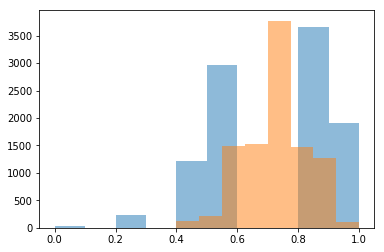

In [15]:
plt.hist(sample_props, alpha=.5);
plt.hist(np.array(sample_props_20), alpha=.5);
#  The blue is NOT normally distributed
# The orange Yes
# Given our assumptions about the Central Limit Theorem What would you trust?